In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu May 14 11:29:41 2020

@author: williammartin
"""

# import standard libraries
import matplotlib.pyplot as plt
import numpy as np
# import third-party libraries
import pandas as pd
# import local libraries

# read table 1
tab1 =  pd.read_csv('table1.csv', index_col = 0)
# fill missing values
tab1 = tab1.fillna(1)
tab1 *= tab1.T

# read table 2
tab2 = pd.read_csv('table2.csv', index_col = 0)

# a)

In [2]:
gamma = 3.0
corr =  tab1.copy()
std = tab2['sigma'].copy()/100
weq = tab2['weight'].copy()/100
# compute covariance matrix
sigma = pd.DataFrame(data = np.nan, columns = corr.columns,
                   index =  corr.index)
for i, ser in corr.iterrows():
    for j, v in ser.iteritems():
        sigma.loc[i, j] = std[i]*std[j]*v
mu0 = gamma*sigma.dot(weq)

In [3]:
print('The expected return vector mu0')
mu0

The expected return vector mu0


Australia    0.047251
Canada       0.082982
France       0.100297
Germany      0.108327
Japan        0.051634
UK           0.081212
USA          0.090721
dtype: float64

# b)

In [4]:
gamma = 2.5 # we assume this gamma for the rest of the exercise
tau = 0.05
omega0 = tau*sigma
sigma0 = omega0 + sigma
w0 = pd.Series(np.linalg.inv(sigma0).dot(mu0)/gamma, index = corr.index)
wdiff = w0-weq

In [5]:
print('Optimal portfolio w0')
w0

Optimal portfolio w0


Australia    0.018286
Canada       0.025143
France       0.059429
Germany      0.062857
Japan        0.132571
UK           0.141714
USA          0.702857
dtype: float64

In [6]:
print('Deviation of w0 from the equilibrium market weights weq')
wdiff

Deviation of w0 from the equilibrium market weights weq


Australia    0.002286
Canada       0.003143
France       0.007429
Germany      0.007857
Japan        0.016571
UK           0.017714
USA          0.087857
dtype: float64

# c)

In [7]:
q = np.array([[0.06], [0.02]])
P = pd.DataFrame(data = 0, index = range(2), columns =  corr.columns)
# first view
P.loc[0, 'Germany'] = 1
P.loc[0, 'France'] = -weq['France']/(weq['France'] + weq['UK'])
P.loc[0, 'UK'] = -weq['UK']/(weq['France'] + weq['UK'])
# second view
P.loc[1, 'Canada'] =  1
P.loc[1, 'USA'] = -1

# turn to numpy arrays
P = P.values
mu0 = pd.DataFrame(mu0, index = mu0.index)
mu0 = mu0.values
omega0 = omega0.values

# off diagonal elements are 0 = views are uncorrelated
omega = np.array([[0.021, 0], [0,  0.017]])*tau
omega_inv = np.linalg.inv(omega)
omega0_inv = np.linalg.inv(omega0)

# equations of slide 13 theorme
mu_bar1 = mu0 + omega0@P.T@np.linalg.inv(P@omega0@P.T + omega)@(q - P@mu0)
omega_bar1 = omega0 - omega0@P.T@np.linalg.inv(P@omega0@P.T + omega)@P@omega0

# equations of slide 13 after some algebra
mu_bar2 = np.linalg.inv(omega0_inv + P.T@omega_inv@P)@(omega0_inv@mu0 + P.T@omega_inv@q)
omega_bar2 = np.linalg.inv(omega0_inv + P.T@omega_inv@P)

# turn to dataframe
mu_bar1 = pd.DataFrame(mu_bar1.reshape(-1, 1), index = corr.index)
mu_bar2 = pd.DataFrame(mu_bar2.reshape(-1, 1), index = corr.index)

omega_bar1 = pd.DataFrame(data = omega_bar1, index = corr.index,
                          columns = corr.columns)
omega_bar2 = pd.DataFrame(data = omega_bar2, index = corr.index,
                          columns = corr.columns)

In [8]:
print('mu bar with first method')
mu_bar1

mu bar with first method


,0
Australia,0.052669
Canada,0.099532
France,0.112952
Germany,0.133900
Japan,0.054910
UK,0.083590
USA,0.092511


In [9]:
print('mu bar with second method')
mu_bar2

mu bar with second method


,0
Australia,0.052669
Canada,0.099532
France,0.112952
Germany,0.133900
Japan,0.054910
UK,0.083590
USA,0.092511


Both results of mu bar are identical

In [10]:
print('omega bar with first method')
omega_bar1

omega bar with first method


,Australia,Canada,France,Germany,Japan,UK,USA
Australia,0.001247,0.000724,0.000870,0.000951,0.000720,0.000804,0.000701
Canada,0.000724,0.001784,0.001513,0.001498,0.000615,0.001206,0.001503
France,0.000870,0.001513,0.002890,0.002500,0.000882,0.001906,0.001466
Germany,0.000951,0.001498,0.002500,0.002827,0.000920,0.002028,0.001456
Japan,0.000720,0.000615,0.000882,0.000920,0.002195,0.000842,0.000588
UK,0.000804,0.001206,0.001906,0.002028,0.000842,0.001993,0.001201
USA,0.000701,0.001503,0.001466,0.001456,0.000588,0.001201,0.001646


In [11]:
print('omega bar with second method')
omega_bar2

omega bar with second method


,Australia,Canada,France,Germany,Japan,UK,USA
Australia,0.001247,0.000724,0.000870,0.000951,0.000720,0.000804,0.000701
Canada,0.000724,0.001784,0.001513,0.001498,0.000615,0.001206,0.001503
France,0.000870,0.001513,0.002890,0.002500,0.000882,0.001906,0.001466
Germany,0.000951,0.001498,0.002500,0.002827,0.000920,0.002028,0.001456
Japan,0.000720,0.000615,0.000882,0.000920,0.002195,0.000842,0.000588
UK,0.000804,0.001206,0.001906,0.002028,0.000842,0.001993,0.001201
USA,0.000701,0.001503,0.001466,0.001456,0.000588,0.001201,0.001646


Results are the same for Omega bar

# d)

In [12]:
sigma_bar = sigma + omega_bar2
w_star = np.linalg.inv(sigma_bar)@mu_bar2/gamma
w_star = w_star[0]
w_star.index = corr.index
w_star_diff1 = w_star - w0
w_star_diff2 = w_star - weq

In [13]:
w_star

Australia    0.018286
Canada       0.318767
France      -0.044373
Germany      0.414184
Japan        0.132571
UK          -0.105812
USA          0.409233
Name: 0, dtype: float64

In [14]:
w_star_diff1

Australia    1.065120e-15
Canada       2.936240e-01
France      -1.038012e-01
Germany      3.513272e-01
Japan        1.387779e-16
UK          -2.475260e-01
USA         -2.936240e-01
dtype: float64

In [15]:
w_star_diff2

Australia    0.002286
Canada       0.296767
France      -0.096373
Germany      0.359184
Japan        0.016571
UK          -0.229812
USA         -0.205767
dtype: float64

# e)

In [16]:
sigma = sigma.values
lam = 1/gamma * np.linalg.inv(P@sigma@P.T + (1 + 1/tau)*omega)@(q - 1/(1+tau)*P@mu0)
lam

array([[0.3513272 ],
       [0.29362404]])

# f)

Text(0, 0.5, 'lambda 3')

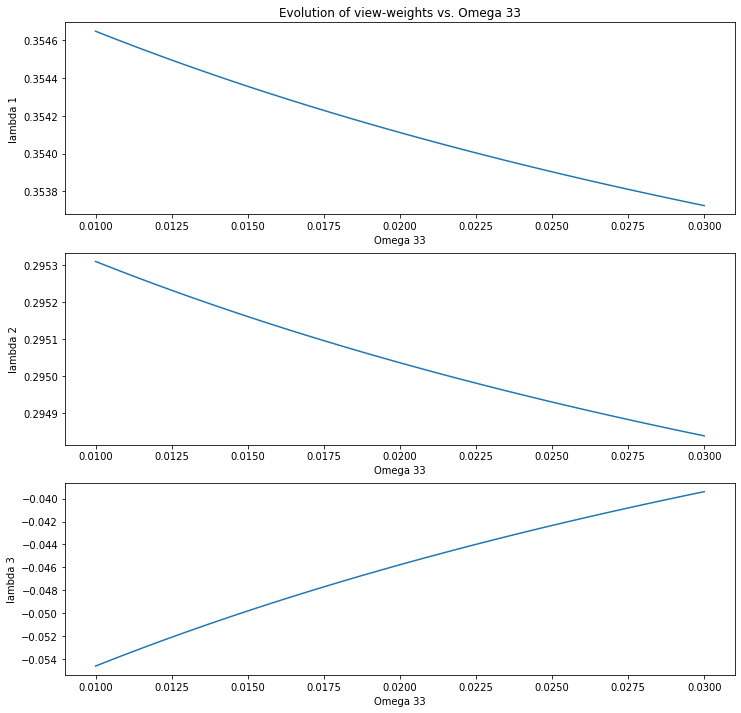

In [43]:
q3 = np.array([[0.06], [0.02], [0.045]])
P3 = pd.DataFrame(data = 0, index = range(3), columns =  corr.columns)
# first view
P3.loc[0, 'Germany'] = 1
P3.loc[0, 'France'] = -weq['France']/(weq['France'] + weq['UK'])
P3.loc[0, 'UK'] = -weq['UK']/(weq['France'] + weq['UK'])
# second view
P3.loc[1, 'Canada'] =  1
P3.loc[1, 'USA'] = -1
# third view
P3.loc[2, 'Japan'] = 1
P3 = P3.values

plot_lam1 = []
plot_lam2 = []
plot_lam3 = []
plot_om3 = np.linspace(0.01, 0.03, 50)
plot_wstar = pd.DataFrame(data = np.nan, columns = sigma0.columns,
                          index = plot_om3)
for e in plot_om3:
    omega3 = np.array([[0.021, 0, 0], [0, 0.017, 0], [0, 0, e]])*tau
    omega_inv3 = np.linalg.inv(omega3)
    mu_bar3 = np.linalg.inv(omega0_inv + P3.T@omega_inv3@P3)@(omega0_inv@mu0 + P3.T@omega_inv3@q3)
    omega_bar3 = np.linalg.inv(omega0_inv + P3.T@omega_inv3@P3)
    sigma_bar3 = sigma + omega_bar3
    w_star3 = np.linalg.inv(sigma_bar3)@mu_bar3/gamma
    lam3 = 1/gamma * np.linalg.inv(P3@sigma@P3.T + (1 + 1/tau)*omega3)@(q3 - 1/(1+tau)*P3@mu0)
    # memorize lambdas
    plot_lam1.append(lam3[0][0])
    plot_lam2.append(lam3[1][0])
    plot_lam3.append(lam3[2][0])
    # plot optimal weights for each continent
    plot_wstar.loc[e, :] = w_star3.T
    

fig, ax = plt.subplots(figsize = (12, 12), nrows = 3, ncols = 1)
ax[0].set_title('Evolution of view-weights vs. Omega 33')

ax[0].plot(plot_om3, plot_lam1)
ax[0].set_xlabel('Omega 33')
ax[0].set_ylabel('lambda 1')

ax[1].plot(plot_om3, plot_lam2)
ax[1].set_xlabel('Omega 33')
ax[1].set_ylabel('lambda 2')

ax[2].plot(plot_om3, plot_lam3)
ax[2].set_xlabel('Omega 33')
ax[2].set_ylabel('lambda 3')

Text(0, 0.5, '$w^*$ by country')

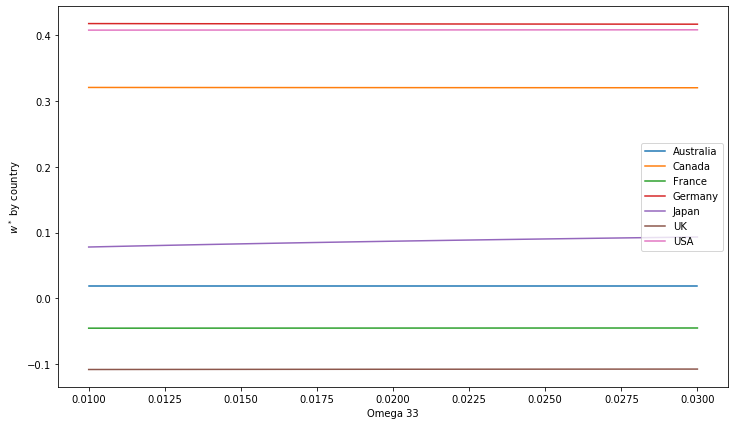

In [50]:
fig, ax = plt.subplots(figsize = (12, 7))
plot_wstar.plot(ax = ax)
ax.set_xlabel('Omega 33')
ax.set_ylabel('$w^*$ by country')